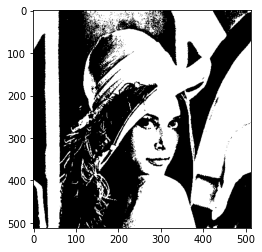

In [21]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np


lena = cv2.imread('C:/Users/kaiyuchou/test_data/lena.bmp', cv2.IMREAD_GRAYSCALE)

x =  lena.shape[0] #寬尺寸
y =  lena.shape[1] #長尺寸

lena_binary = np.zeros(lena.shape, int)

for i in range(0, x, 1):
    for j in range(0, y, 1):
        if (lena[i][j] >= 128):
            lena_binary[i][j] = 255
        else:
            lena_binary[i][j] = 0

cv2.imwrite('lena_binary.bmp', lena_binary)
plt.imshow(lena_binary, cmap = 'gray')


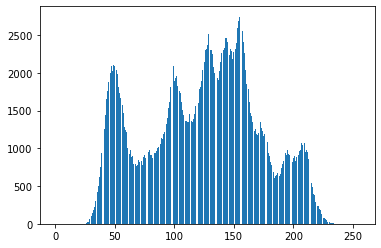

In [5]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

lena = cv2.imread('C:/Users/kaiyuchou/test_data/lena.bmp', cv2.IMREAD_GRAYSCALE)

x =  lena.shape[0] #寬尺寸
y =  lena.shape[1] #長尺寸

histogram = np.zeros(256, int)

for i in range(0, x, 1):
    for j in range(0, y, 1):
        histogram[lena[i][j]] += 1
        
cv2.imwrite('histogram.jpg', histogram)
plt.bar(range(len(histogram)), histogram)
plt.show()

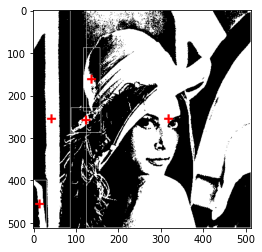

In [7]:
from PIL import Image, ImageDraw
import numpy as np
import cv2 
import matplotlib.pyplot as plt

#LIFO 分別為push進去跟pop出來及判別為空
class Stack:
    def __init__(self):
        self.list = []

    def push(self,item):
        self.list.append(item)

    def pop(self):
        return self.list.pop()

    def isEmpty(self):
        return len(self.list) == 0

#threshold 500
threshold = 500

#file 
lena = cv2.imread('C:/Users/kaiyuchou/test_data/lena.bmp', cv2.IMREAD_GRAYSCALE)
lena_binary = cv2.imread('lena_binary.bmp', cv2.IMREAD_GRAYSCALE)

#size
sum1 =  lena.shape[0] #寬尺寸
sum2 =  lena.shape[1] #長尺寸

num = np.zeros(lena.shape, int)
labeleArray = np.zeros(lena.shape, int)
Count = 1
#紀錄有多少pixel
numberLabel = np.zeros(x * y)

for i in range(sum1):
    for j in range(sum2):
        #如過pixel是0的話就標視為到過
        if lena_binary.getpixel((i, j)) == 0:
            num[i, j] = 1
        elif num[i, j] == 0:
            stack = Stack()
            #把位置放進去
            stack.push((i, j))
            while not stack.isEmpty():
                #如過不是空的就把他pop出來
                col, row = stack.pop()

                if num[col, row] == 1:
                    continue
                num[col, row] = 1
                labeleArray[col, row] = Count
                #看有多少pixel在這個標示裡
                numberLabel[Count] = numberLabel[Count] + 1
                #確認周圍的
                for a in [col - 1, col, col + 1]:
                    for b in [row - 1, row, row + 1]:
                        #當她在lena裡
                        if (0 <= a < sum1) and (0 <= b < sum2):
                            #此位置不是0且沒訪問過
                            if (lena_binary.getpixel((a, b)) != 0) and (num[a, b] == 0):
                                stack.push((a, b))
            Count += 1

rectangles = Stack()
#處理pixel500以上的區域
for regionID, n in enumerate(numberLabel):
    if (n >= threshold):
        rectLeft = sum1
        rectRight = 0
        rectTop = sum2
        rectBottom = 0
        for x in range(sum1):
            for y in range(sum2):
                #從陣列裡搜尋最小的
                if (labeledArray[x, y] == regionID):
                    if (x < rectLeft):
                        rectLeft = x
                    if (x > rectRight):
                        rectRight = x
                    if (y < rectTop):
                        rectTop = y
                    if (y > rectBottom):
                        rectBottom = y
        
        rectangles.push((rectLeft, rectRight, rectTop, rectBottom))
#Create 新的圖但是是RGB
connectedImage = Image.new('RGB', lena.size)
connectedImageArray = connectedImage.load()

#一個pixel一個pixel將binary image 轉為 RGB
for c in range(width):
    for r in range(height):
        if (lena_binary.getpixel((c, r)) == 0):
            connectedImageArray[c, r] = (0, 0, 0)
        else:
            connectedImageArray[c, r] = (255, 255, 255)

#劃出範圍跟十字
while not rectangles.isEmpty():
    #要標出的範圍的資訊
    rectLeft, rectRight, rectTop, rectBottom = rectangles.pop()
    #畫的圖
    draw = ImageDraw.Draw(connectedImage)
    draw.rectangle(((rectLeft, rectTop), (rectRight, rectBottom)), outline = 'white')
    #標出的範圍的中心點
    rectCenterX = (rectLeft + rectRight) / 2
    rectCenterY = (rectTop + rectBottom) / 2
    #垂直及水平的十字線
    draw.line(((rectCenterX - 10, rectCenterY), (rectCenterX + 10, rectCenterY)), fill = 'red', width = 5)
    draw.line(((rectCenterX, rectCenterY - 10), (rectCenterX, rectCenterY + 10)), fill = 'red', width = 5)
    
#存起來跟print出來
connectedImage.save('connected.bmp')
plt.imshow(connectedImage)